# Cosmo Simulation
Code derived from my work at ICE-CSIC (Summer '24) to simulate the evolution of cosmological parameters

In [7]:
# import required libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
dirpath = os.path.dirname(os.path.abspath(__doc__))
data_path = f'/Users/j.alcaide/Documents/ICE_FASE2JiC/SNCOSMO/Results-copy' 

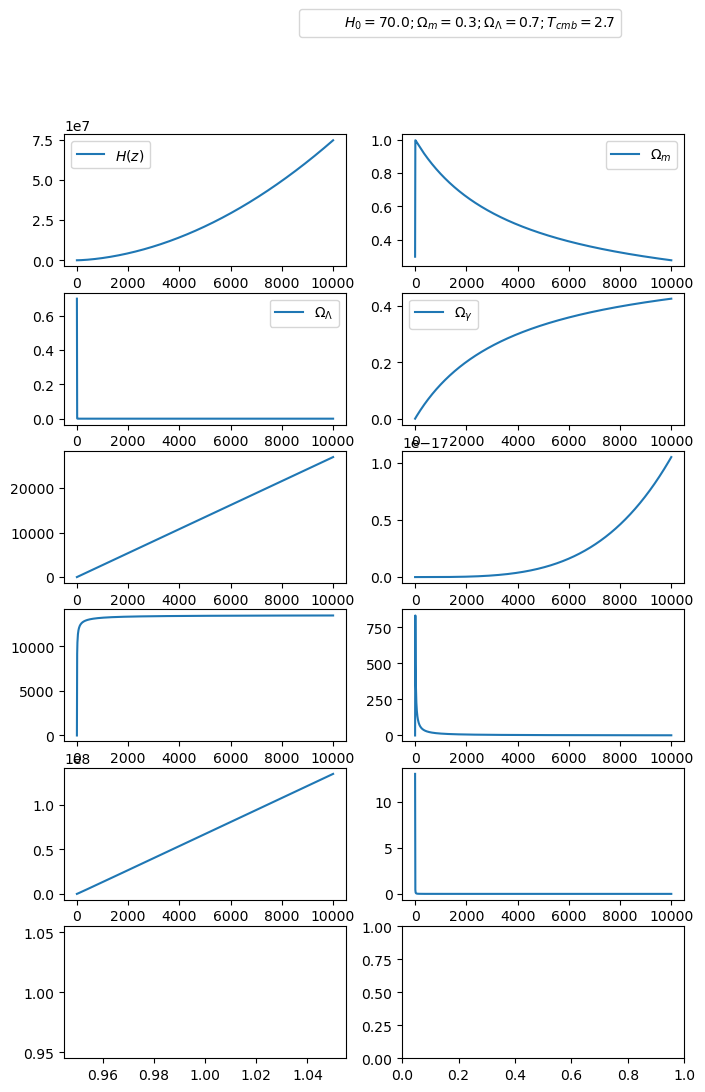

In [118]:
from astropy.cosmology import FlatLambdaCDM, LambdaCDM
cosmo = LambdaCDM(H0=72.01, Om0=0.3, Ode0=0.7, Tcmb0=2.7)
z = np.linspace(0.0, 10000.0, num=1000) # adjust this later for accuracy
H = [cosmo.H(n).value for n in z]
Om = [cosmo.Om(n) for n in z]
Ode = [cosmo.Ode(n) for n in z]
Ogamma = [cosmo.Ogamma(n) for n in z]
Tcmb = [cosmo.Tcmb(n).value for n in z]
pc = [cosmo.critical_density(n).value for n in z]
DC = [cosmo.comoving_distance(n).value for n in z]
DAD = [cosmo.angular_diameter_distance(n).value for n in z]
DL = [cosmo.luminosity_distance(n).value for n in z]
tU = [cosmo.age(n).value for n in z]


fig, axs = plt.subplots(6,2, figsize=(8,12))
axs[0,0].plot(z, H, label='$H(z)$')
axs[0,1].plot(z, Om, label='$\Omega_m$')
axs[1,0].plot(z, Ode, label='$\Omega_\Lambda$')
axs[1,1].plot(z, Ogamma, label='$\Omega_\gamma$')
axs[2,0].plot(z, Tcmb, label='T CMB')
axs[2,1].plot(z, pc, label='$p_{crit}$')
axs[3,0].plot(z, DC, label='$D_C$')
axs[3,1].plot(z, DAD, label='$D_A$')
axs[4,0].plot(z, DL, label='$D_L$')
axs[4,1].plot(z, tU, label='$t(z)$')

for i in range(2):
    for j in range(2):
        axs[i,j].legend()
        axs[i,j].set_xlabel('z')
axs[5,0].scatter(1,1,color='white',label='$H_0 = 70.0; \Omega_m=0.3; \Omega_\Lambda=0.7; T_{cmb}=2.7$')
axs[5,0].legend(bbox_to_anchor=(2, 8))

# plt.tight_layout()
fig.savefig('cosmo_sim1.png', dpi=300)

From my theoretical paper, these values can be computed using the following equations only with redshift, and initial parameters.